## Step 1: Load Required Libraries 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Step 2: Load and Create a Dataset 

In [2]:
data = pd.read_csv('email_spam_dataset.csv')
data.head()

,email_length,num_links,has_attachment,num_exclamations,is_spam
0,1176,2,1,6,0
1,910,3,1,2,0
2,1344,3,0,7,0
3,1180,1,0,2,1
4,1145,4,0,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   email_length      200 non-null    int64
 1   num_links         200 non-null    int64
 2   has_attachment    200 non-null    int64
 3   num_exclamations  200 non-null    int64
 4   is_spam           200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [4]:
x = data.drop('is_spam', axis=1)

In [5]:
y = data['is_spam']

## Step 3: Split Data 

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [7]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Step 4: Train SVM Model 

In [8]:
model = SVC(kernel='linear')
model.fit(x_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## Step 5: Predict and Evaluate 

In [9]:
y_pred = model.predict(x_test)

In [10]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.4666666666666667

In [11]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[16 12]
 [20 12]]


In [12]:
cr = classification_report(y_test,y_pred)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.57      0.50        28
           1       0.50      0.38      0.43        32

    accuracy                           0.47        60
   macro avg       0.47      0.47      0.46        60
weighted avg       0.47      0.47      0.46        60



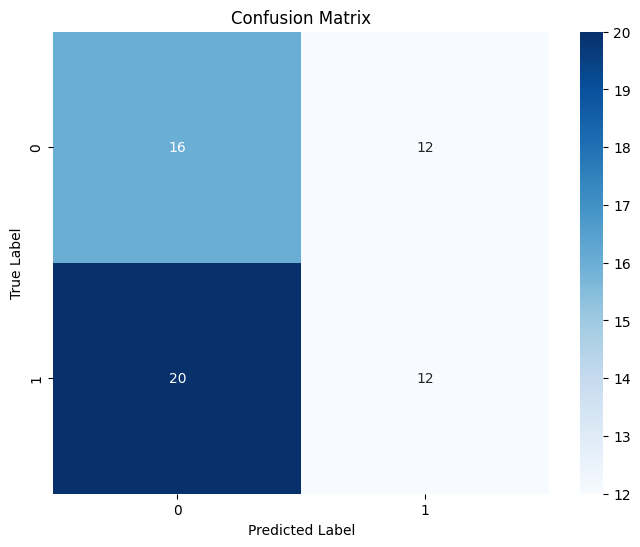

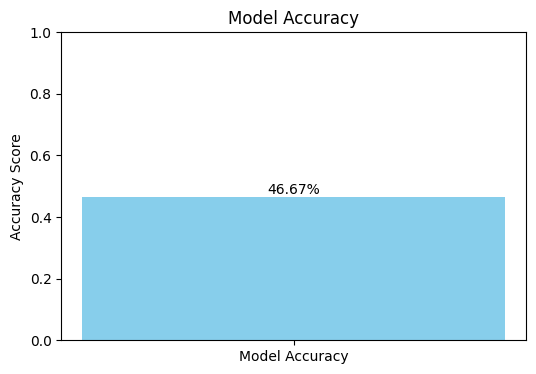

In [16]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Create bar plot for accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Model Accuracy'], [accuracy], color='skyblue')
plt.title('Model Accuracy')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
for i, v in enumerate([accuracy]):
    plt.text(i, v + 0.01, f'{v:.2%}', ha='center')
plt.show()